In [1]:
import numpy as np
import random
import sys, os
import PIL
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

## utiltiy functions such as MSE and structural similarity

In [2]:
def RRMSE(imgRef, imgT):
    diff = imgRef - imgT
#     print('rmse : ', np.linalg.norm(diff)/np.sqrt(diff.size))
    r = np.linalg.norm(diff)/np.linalg.norm(imgRef)
    return r

def SSIM(imgRef, imgT):
    r = ssim(imgRef, imgT, data_range=imgT.max() - imgT.min(), multichannel=True)
    return r

## plotting functions to plot rrmse and ssim values as bar graphs for different images

In [3]:
def plot_vals(vals_NN, vals_BILIN, vals_BICUBIC, vals_SRGAN, vals_SRGANq, mode, savepath=None):
    n = len(vals_NN)
    x = np.array([i for i in range(n)])
    plt.figure(figsize=(25,8))
    ax = plt.subplot(111)
    
    bar_width = 0.1
    opacity = 0.8
    rects1 = plt.bar(x, vals_NN, bar_width,
                 alpha=opacity,
                 color='b',
                 label='NN')
    rects2 = plt.bar(x+1*bar_width, vals_BILIN, bar_width,
                 alpha=opacity,
                 color='g',
                 label='BILIN')
    rects3 = plt.bar(x+2*bar_width, vals_BICUBIC, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='BICUBIC')
    rects4 = plt.bar(x+3*bar_width, vals_SRGAN, bar_width,
                 alpha=opacity,
                 color='r',
                 label='SRGAN')
    rects5 = plt.bar(x+4*bar_width, vals_SRGANq, bar_width,
                 alpha=opacity,
                 color='black',
                 label='SRGANq')
    plt.legend()
    plt.tight_layout()
    if mode == 'RRMSE':
        plt.title('RRMSE values with different algos (NN/BILIN/BICUBIC/SRGAN)')
        plt.ylabel('RRMSE')
    elif mode == 'SSIM':
        plt.title('SSIM values with different algos (NN/BILIN/BICUBIC/SRGAN)')
        plt.ylabel('SSIM')
    plt.xlabel('index of images')
    if savepath != None:
        plt.savefig(savepath)
    plt.show()

In [28]:
#this function will take in the path of the original high_res version, low_res_version, and high_res_version generated
#visualise them on the same scale, get the original resolution from the low_res_version and calculate RRMSE too
rrmse_NN = []
rrmse_BILIN = []
rrmse_BICUBIC = []
rrmse_SRGAN = []
rrmse_SRGANq = []

ssim_NN = []
ssim_BILIN = []
ssim_BICUBIC = []
ssim_SRGAN = []
ssim_SRGANq = []
def analyse_output(high_res_path, low_res_path, high_fake_path, high_fake_pathq, savepath=None):
    i_orig = PIL.Image.open(high_res_path)
    w_high, h_high = i_orig.size
    i_low = PIL.Image.open(low_res_path)
    i_high_fake = PIL.Image.open(high_fake_path)
    i_high_fakeq = PIL.Image.open(high_fake_pathq)
    
    #now first generating low res to high res using standard algos
    i_low2high_NN = i_low.resize((w_high, h_high), PIL.Image.NEAREST)
    i_low2high_BILIN = i_low.resize((w_high, h_high), PIL.Image.BILINEAR)
    i_low2high_BICUBIC = i_low.resize((w_high, h_high), PIL.Image.BICUBIC)
    
    #plotting all the version on same resolution, note that even while plotting there might
    #be some internal resizing of the images would be happening...
    plt.figure(figsize=(14, 10))
    plt.suptitle(low_res_path)
    plt.subplot(231)
    plt.title('low')
    plt.imshow(np.array(i_low))
    ##
    plt.subplot(232)
    plt.title('original')
    plt.imshow(np.array(i_orig))
    m1,s1 = RRMSE(np.array(i_orig), np.array(i_orig)), SSIM(np.array(i_orig), np.array(i_orig))
    plt.xlabel('rrmse: {:.5f}, ssim: {:.5f}'.format(m1, s1))
    ##
    plt.subplot(233)
    plt.title('Nearest neighbor')
    plt.imshow(np.array(i_low2high_NN))
    m2,s2 = RRMSE(np.array(i_orig), np.array(i_low2high_NN)), SSIM(np.array(i_orig), np.array(i_low2high_NN))
    plt.xlabel('rrmse: {:.5f}, ssim: {:.5f}'.format(m2, s2))
    ##
    plt.subplot(234)
    plt.title('Bilnear')
    plt.imshow(np.array(i_low2high_BILIN))
    m3,s3 = RRMSE(np.array(i_orig), np.array(i_low2high_BILIN)), SSIM(np.array(i_orig), np.array(i_low2high_BILIN))
    plt.xlabel('rrmse: {:.5f}, ssim: {:.5f}'.format(m3, s3))
    ##
    plt.subplot(235)
    plt.title('Bicubic')
    plt.imshow(np.array(i_low2high_BICUBIC))
    m4,s4 = RRMSE(np.array(i_orig), np.array(i_low2high_BICUBIC)), SSIM(np.array(i_orig), np.array(i_low2high_BICUBIC))
    plt.xlabel('rrmse: {:.5f}, ssim: {:.5f}'.format(m4, s4))
    ##
#     plt.subplot(336)
#     plt.title('SRGAN')
#     plt.imshow(np.array(i_high_fake))
#     m5,s5 = RRMSE(np.array(i_orig), np.array(i_high_fake)), SSIM(np.array(i_orig), np.array(i_high_fake))
#     plt.xlabel('rrmse: {:.5f}, ssim: {:.5f}'.format(m5, s5))
    ##
    plt.subplot(236)
    plt.title('SRGAN')
    plt.imshow(np.array(i_high_fakeq))
    m6,s6 = RRMSE(np.array(i_orig), np.array(i_high_fakeq)), SSIM(np.array(i_orig), np.array(i_high_fakeq))
    plt.xlabel('rrmse: {:.5f}, ssim: {:.5f}'.format(m6, s6))
    
    if savepath:
        plt.savefig(savepath)
    
#     print('RRMSE val between original high and low2high_NN : {}'.format(RRMSE(np.array(i_orig), np.array(i_low2high_NN))))
    rrmse_NN.append(m2)
    ssim_NN.append(s2)
#     print('RRMSE val between original high and low2high_BILIN : {}'.format(RRMSE(np.array(i_orig), np.array(i_low2high_BILIN))))
    rrmse_BILIN.append(m3)
    ssim_BILIN.append(s3)
#     print('RRMSE val between original high and low2high_BICUBIC : {}'.format(RRMSE(np.array(i_orig), np.array(i_low2high_BICUBIC))))
    rrmse_BICUBIC.append(m4)
    ssim_BICUBIC.append(s4)
#     print('RRMSE val between original high and low2high_SRGAN : {}'.format(RRMSE(np.array(i_orig), np.array(i_high_fake))))
#     rrmse_SRGAN.append(m5)
#     ssim_SRGAN.append(s5)
    
    rrmse_SRGANq.append(m6)
    ssim_SRGANq.append(s6)
#     print('\n')

## Visulisations

#### Sometypical high resolution patches
* Some of the high resolution patches look as follows, they are of dimenstion **3X256X256 pixels, i.e RGB image of 256X256 dimension**
* Corresponding low resolution patches are also shown, note that low resolution image is **3X64X64, i.e RGB image of 64X64 dimensions, 16 times smaller!**

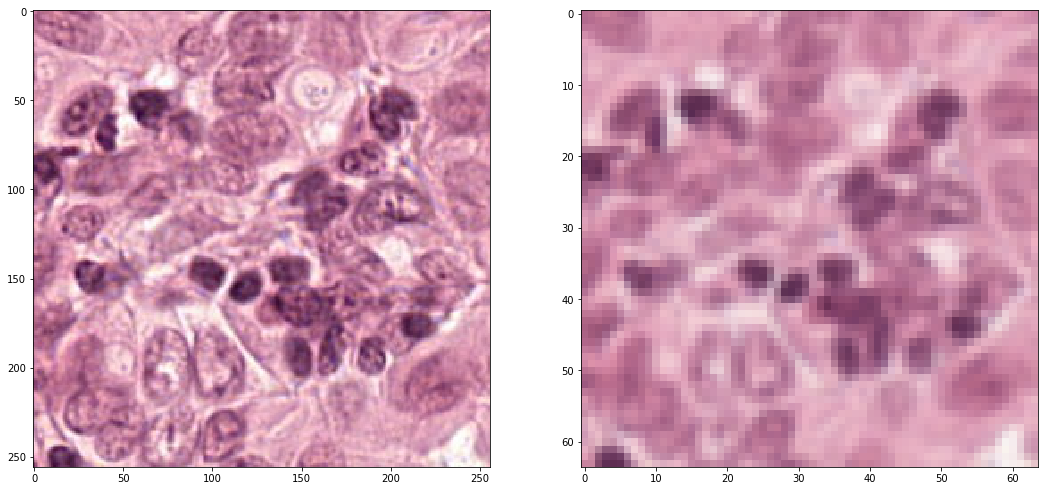

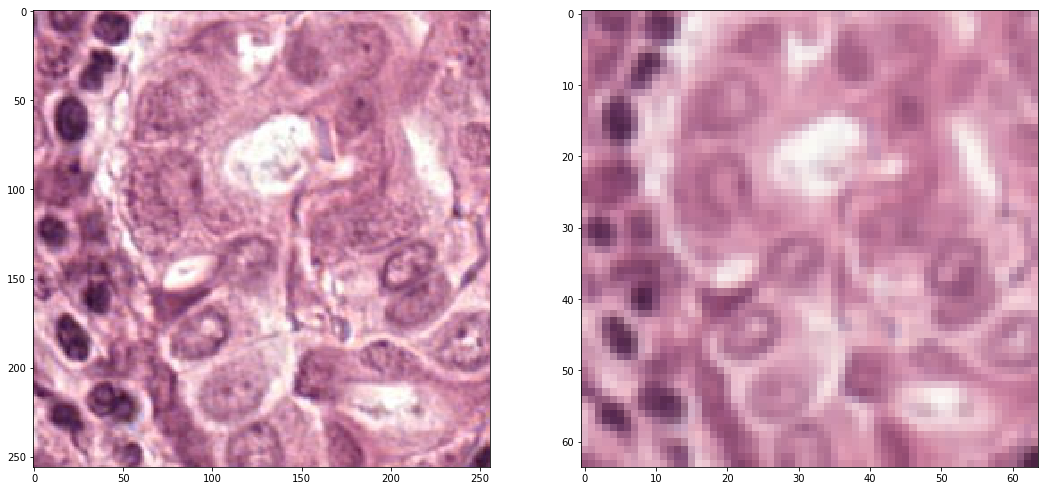

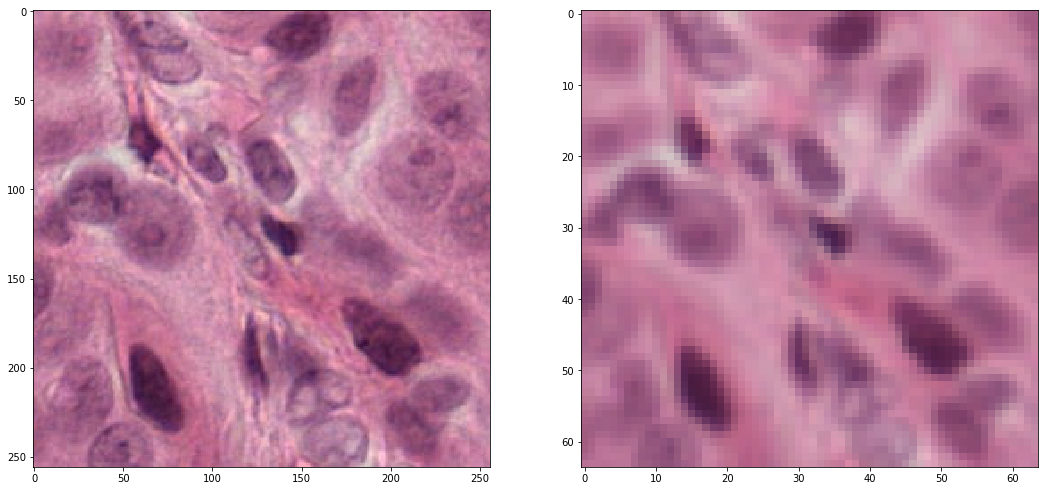

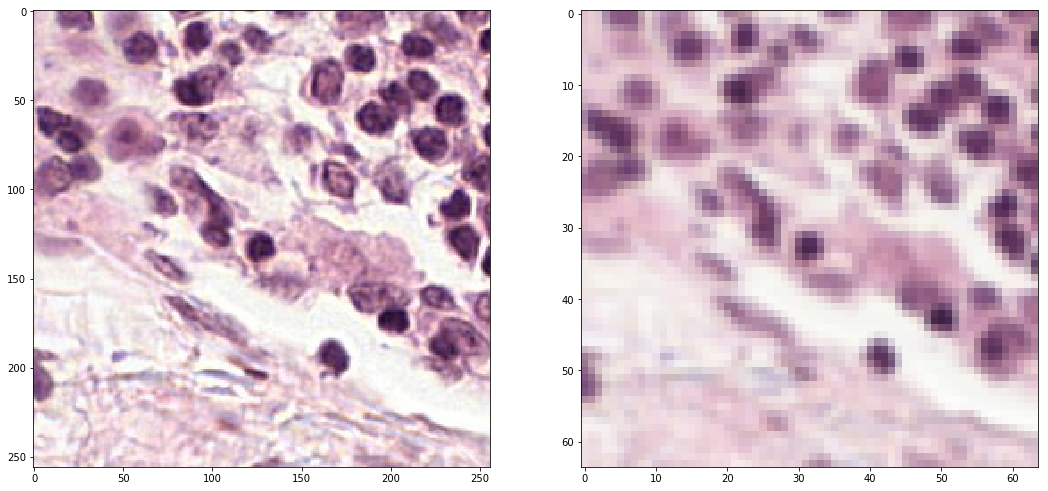

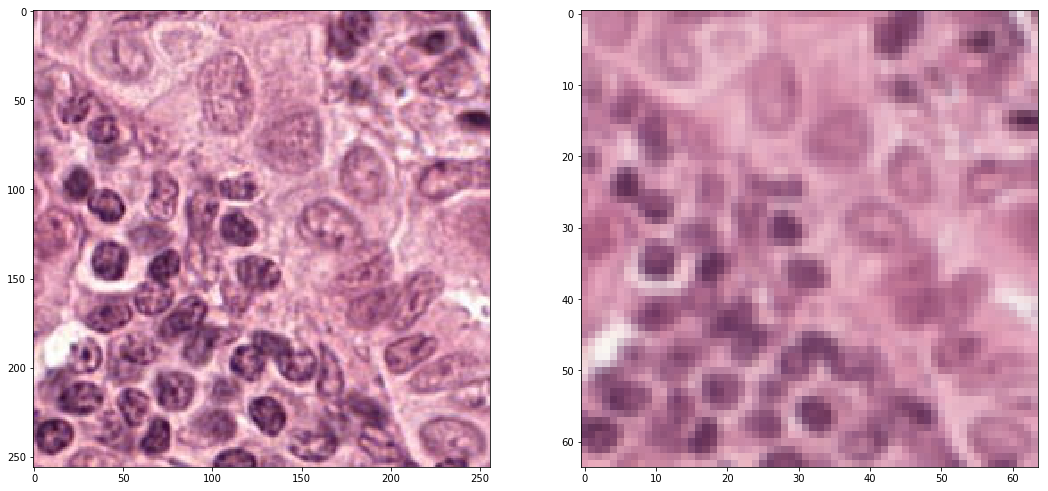

In [15]:
high_res_real_path = '../outputs/mse_eph50_run0/high_res_real/'
high_res_fake_path = '../outputs/lqnorm_eph50_run0/high_res_fake/'
low_res_path = '../outputs/mse_eph50_run0/low_res/'

for i in range(5):
    img1 = PIL.Image.open(high_res_real_path+'{}.png'.format(i))
    img2 = PIL.Image.open(high_res_fake_path+'{}.png'.format(i))
    img3 = PIL.Image.open(low_res_path+'{}.png'.format(i))

    plt.figure(figsize=(18, 20))
    plt.subplot(121)
    plt.imshow(np.array(img1))
    plt.subplot(122)
    plt.imshow(np.array(img3))

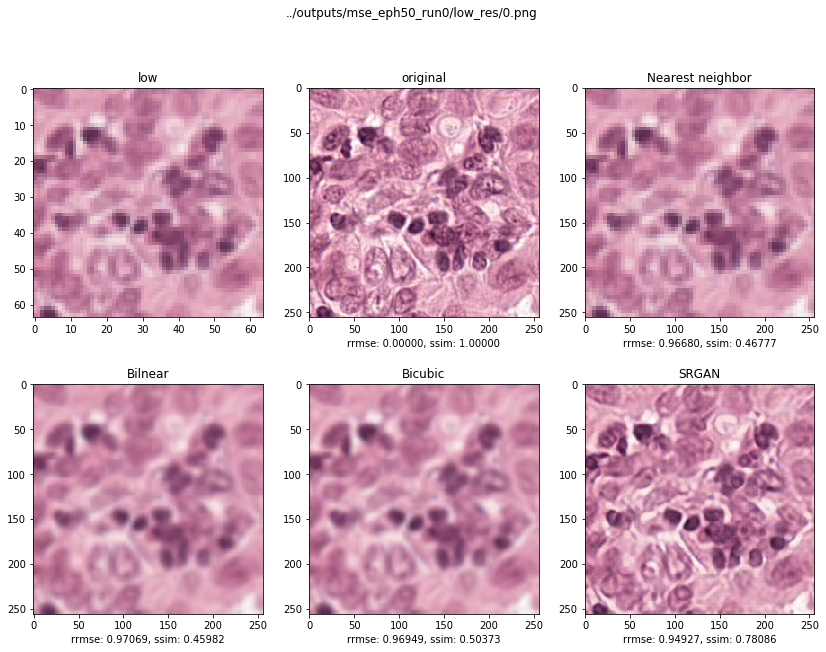

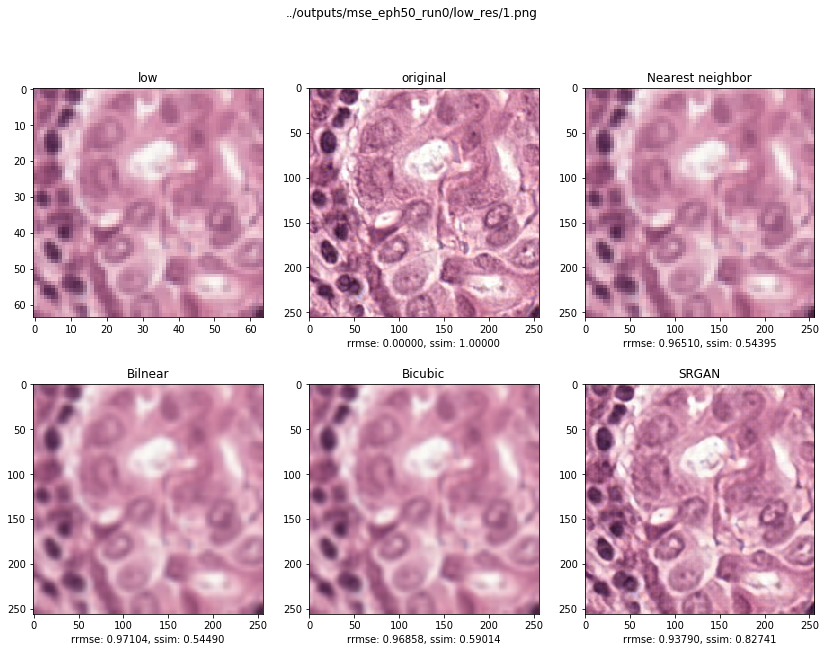

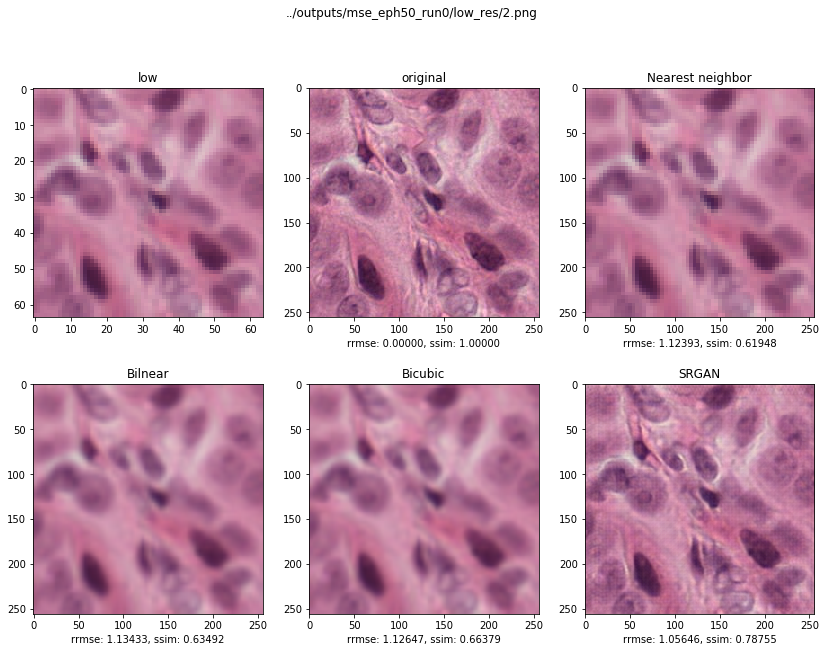

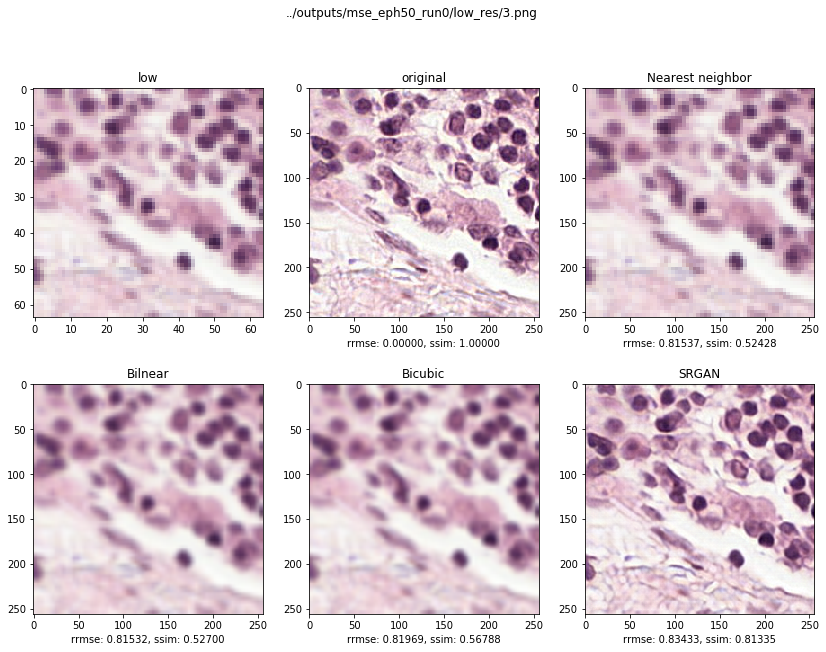

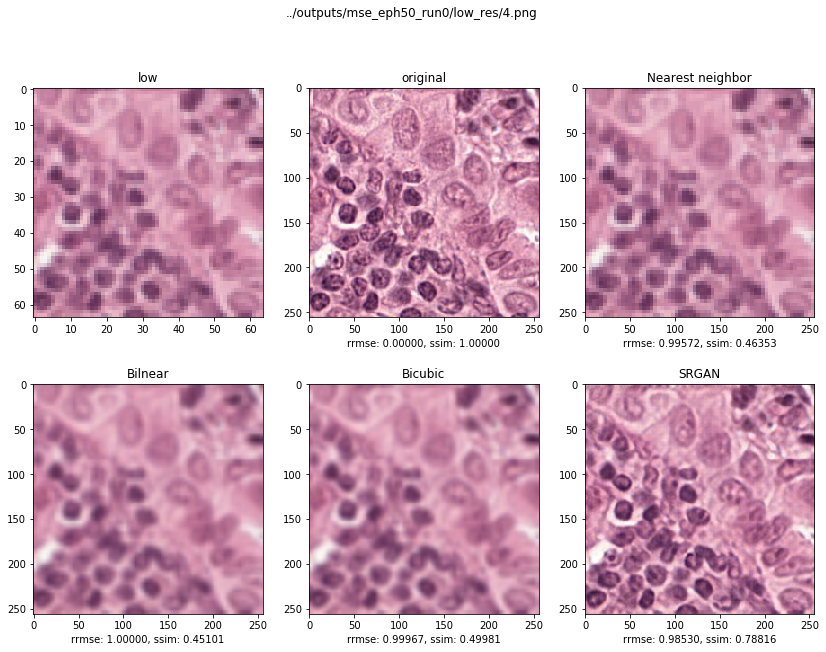

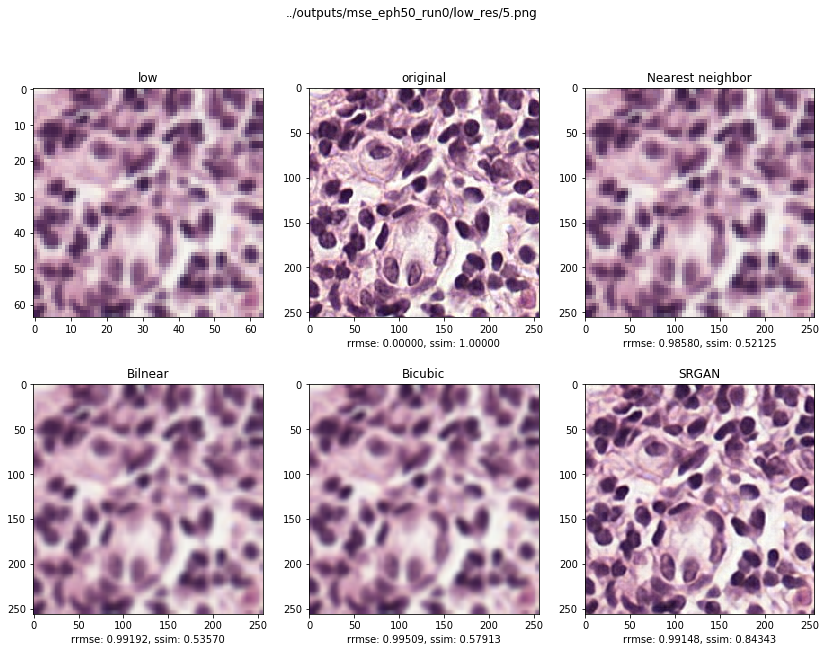

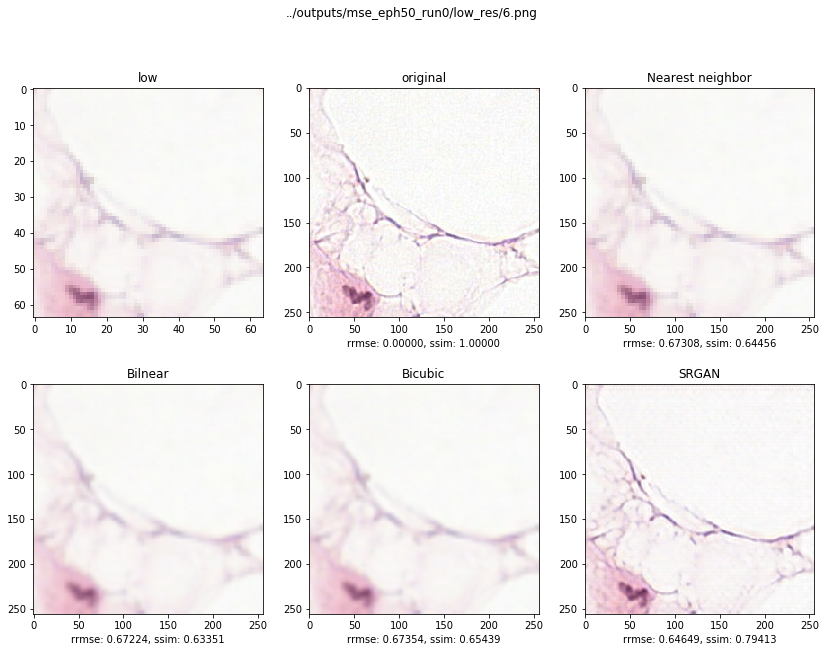

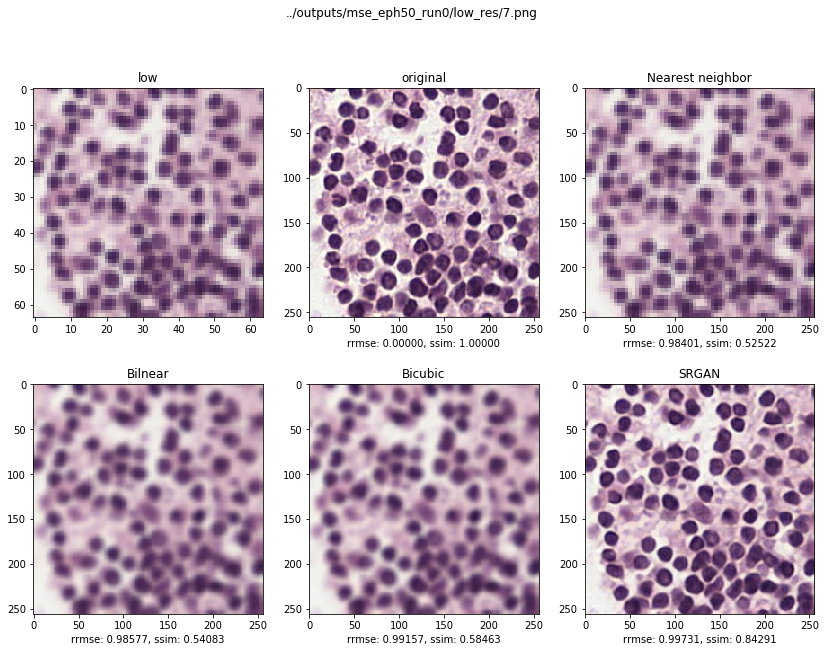

In [29]:
for i in range(8):
    analyse_output(
        '../outputs/mse_eph50_run0/high_res_real/{}.png'.format(i),
        '../outputs/mse_eph50_run0/low_res/{}.png'.format(i), 
        '../outputs/mse_eph50_run0/high_res_fake/{}.png'.format(i),
        '../outputs/lqnorm_eph50_run0/high_res_fake/{}.png'.format(i),
        '../outputs/lqnorm_eph50_run0/{}.png'.format(i)
    )